In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it
import scipy as scp
import pandas as pd
import copy as cp
from tqdm import tqdm 

sns.set_theme(style="whitegrid",context='talk', font_scale=1.2)
%matplotlib inline

In [2]:
%run digital_worm_2d_v3.py

## Figure 1d

In [3]:
init_food = 1e9 #the initial amount of food available to the population. 

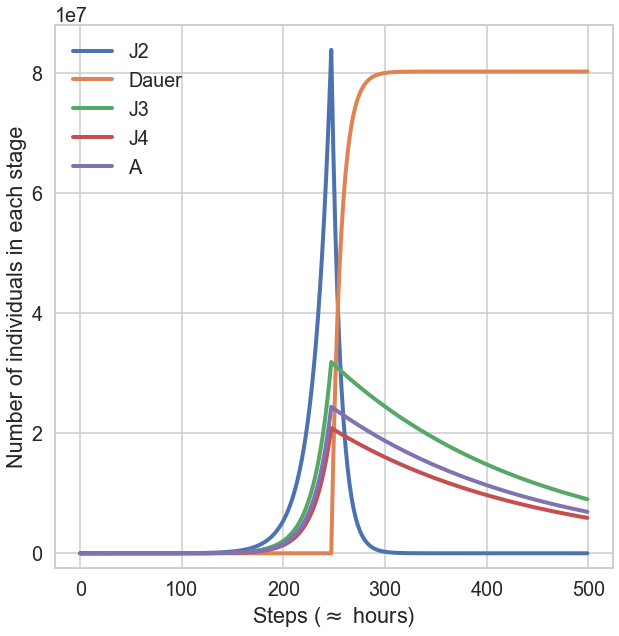

In [5]:
dim = (2,2)
data, index, mdata, pdata = simulate_pop_dynamic('A', 'C', 'OP50', inti_food=init_food, mig_rate=0.0, n_pop=dim, t=500, predation=False)

fig, ax = plt.subplots(1, 1, figsize=(10,10))

labls = ['J2', 'Dauer', 'J3', 'J4', 'A']

count =0 
for l in np.arange(1, 6, 1):
    if l == 5:
        ax.plot([np.sum(i[5:]) for i in data['pop1'][(0,0)]], label=labls[count], lw=4)
    else:
        ax.plot([i[l][0] for i in data['pop1'][(0,0)]], label=labls[count], lw=4)
    count += 1
        
plt.legend(frameon=False)

ax.set_ylabel('Number of individuals in each stage')
ax.set_xlabel(r'Steps ($\approx$ hours)')

ax.set_ylim(-2.5e6, 8.8e7)

plt.show()

## Figure 2b

In [6]:
dim = (10,10)
init_food = 1e9
data, index, mdata, pdata = simulate_pop_dynamic('A', 'C', 'OP50', inti_food=init_food, mig_rate=0.05, n_pop=dim, t=1000, predation=True)

In [8]:
data_A = {'level_0': [], 'level_1': [], 'freq': []}
for i in range(dim[0]):
    for j in range(dim[0]):
        data_A['level_0'].append(i)
        data_A['level_1'].append(j)
        n = np.sum(data['pop1'][(i,j)][-1][5:])
        N = np.sum(data['pop1'][(i,j)][-1][5:]) + np.sum(data['pop2'][(i,j)][-1][5:])
        data_A['freq'].append(n/N)
data_A = pd.DataFrame(data_A)

data_d = {'level_0': [], 'level_1': [], 'freq': []}
for i in range(dim[0]):
    for j in range(dim[0]):
        data_d['level_0'].append(i)
        data_d['level_1'].append(j)
        n = data['pop1'][(i,j)][-1][2][0]
        N = data['pop1'][(i,j)][-1][2][0] + data['pop2'][(i,j)][-1][2][0]
        data_d['freq'].append(n/N)
data_d = pd.DataFrame(data_d)

<Figure size 720x720 with 0 Axes>

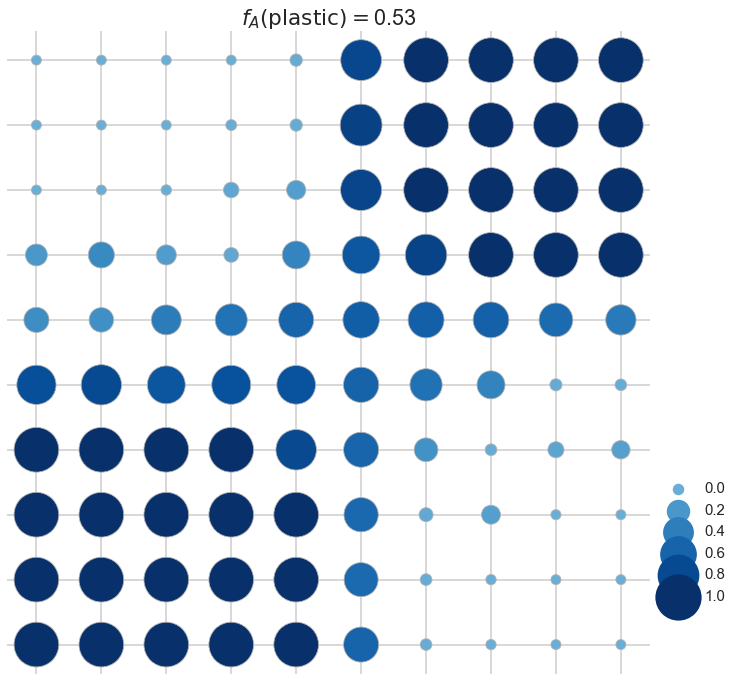

In [10]:
fig = plt.figure(figsize=(dim[0],dim[1]))

name = r'$f_{A}(\mathrm{plastic}) = $' + str(np.round(np.mean(data_A['freq']), decimals=2))

g = sns.relplot(
    data=data_A,
    x="level_0", y="level_1", hue="freq", size="freq",
    palette="Blues", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(100, 2000), size_norm=(0, 1), clip_on=False
)
g.set(xlabel="", ylabel='', aspect="equal", yticks=range(10), title=name, xticks=range(10), yticklabels=[], xticklabels=[])
g.despine(left=True, bottom=True)

for artist in g.legend.legendHandles:
    artist.set_edgecolor(".8")
    
handles, labels = plt.gca().get_legend_handles_labels()

g._legend.remove()

plt.legend(handles, labels, loc=(1.01,0.1),frameon=False, edgecolor='white', markerscale=1., fontsize=15)

plt.savefig('../fig2b1.pdf', bbox_inches='tight', dpi=300)

<Figure size 720x720 with 0 Axes>

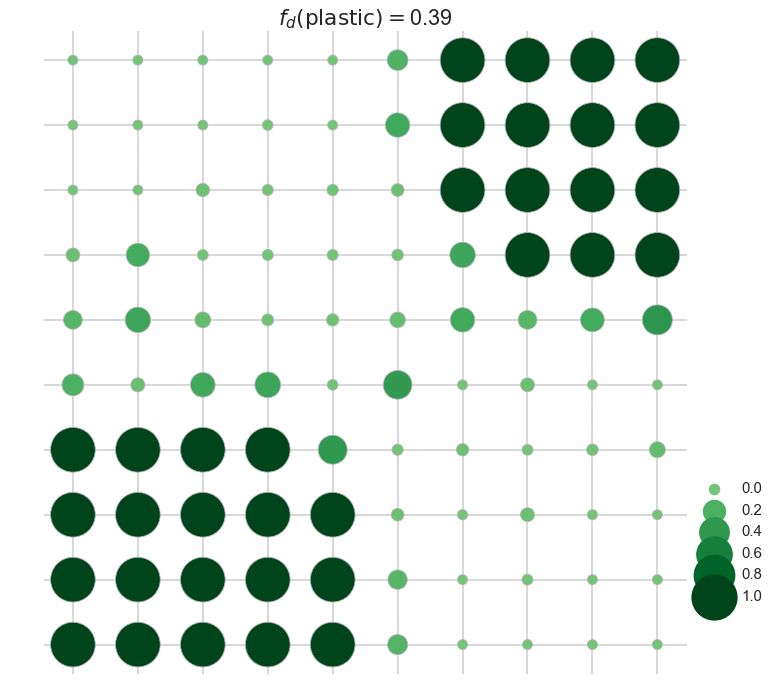

In [12]:
fig = plt.figure(figsize=(10,10))

name = r'$f_{d}(\mathrm{plastic}) = $' + str(np.round(np.mean(data_d['freq']), decimals=2))

g = sns.relplot(
    data=data_d,
    x="level_0", y="level_1", hue="freq", size="freq",
    palette="Greens", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(100, 2000), size_norm=(0, 1), clip_on=False
)
g.set(xlabel="", ylabel="   ", aspect="equal", yticks=range(10), title=name, xticks=range(10), yticklabels=[], xticklabels=[])
g.despine(left=True, bottom=True)

for artist in g.legend.legendHandles:
    artist.set_edgecolor(".8")
    
handles, labels = plt.gca().get_legend_handles_labels()

g._legend.remove()

plt.legend(handles, labels, loc=(1.01,0.1),frameon=False, edgecolor='white', markerscale=1., fontsize=15)

plt.savefig('../fig2b2.pdf', bbox_inches='tight', dpi=300)

## Figure 2c

In [13]:
dim = (10,10)
init_food = 1e9
data, index, mdata, pdata = simulate_pop_dynamic('A', 'C', 'Novo', inti_food=init_food, mig_rate=0.05, n_pop=dim, t=1000, predation=True)

In [14]:
data_A = {'level_0': [], 'level_1': [], 'freq': []}
for i in range(dim[0]):
    for j in range(dim[0]):
        data_A['level_0'].append(i)
        data_A['level_1'].append(j)
        n = np.sum(data['pop1'][(i,j)][-1][5:])
        N = np.sum(data['pop1'][(i,j)][-1][5:]) + np.sum(data['pop2'][(i,j)][-1][5:])
        data_A['freq'].append(n/N)
data_A = pd.DataFrame(data_A)

data_d = {'level_0': [], 'level_1': [], 'freq': []}
for i in range(dim[0]):
    for j in range(dim[0]):
        data_d['level_0'].append(i)
        data_d['level_1'].append(j)
        n = data['pop1'][(i,j)][-1][2][0]
        N = data['pop1'][(i,j)][-1][2][0] + data['pop2'][(i,j)][-1][2][0]
        data_d['freq'].append(n/N)
data_d = pd.DataFrame(data_d)

<Figure size 720x720 with 0 Axes>

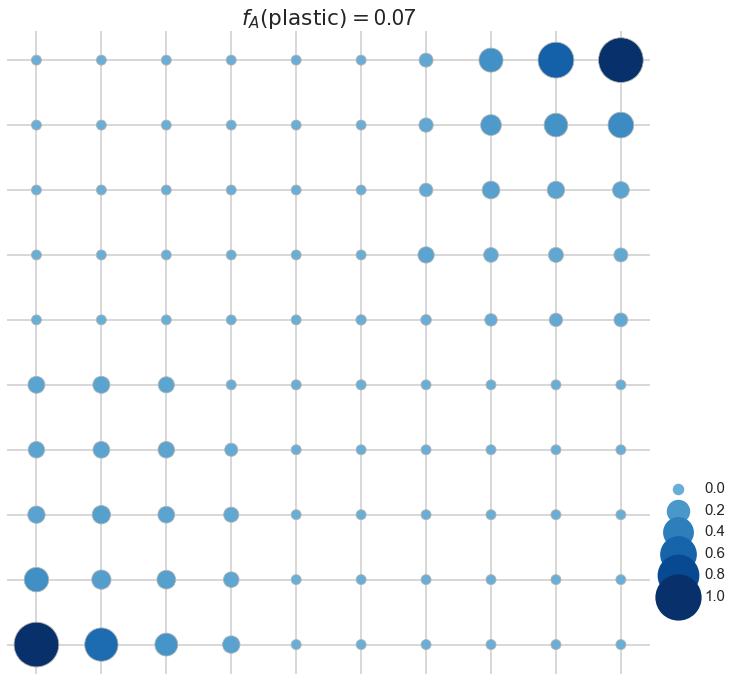

In [15]:
fig = plt.figure(figsize=(dim[0],dim[1]))

name = r'$f_{A}(\mathrm{plastic}) = $' + str(np.round(np.mean(data_A['freq']), decimals=2))

g = sns.relplot(
    data=data_A,
    x="level_0", y="level_1", hue="freq", size="freq",
    palette="Blues", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(100, 2000), size_norm=(0, 1), clip_on=False
)
g.set(xlabel="", ylabel='', aspect="equal", yticks=range(10), title=name, xticks=range(10), yticklabels=[], xticklabels=[])
g.despine(left=True, bottom=True)

for artist in g.legend.legendHandles:
    artist.set_edgecolor(".8")
    
handles, labels = plt.gca().get_legend_handles_labels()

g._legend.remove()

plt.legend(handles, labels, loc=(1.01,0.1),frameon=False, edgecolor='white', markerscale=1., fontsize=15)

plt.savefig('../fig2c1.pdf', bbox_inches='tight', dpi=300)

<Figure size 720x720 with 0 Axes>

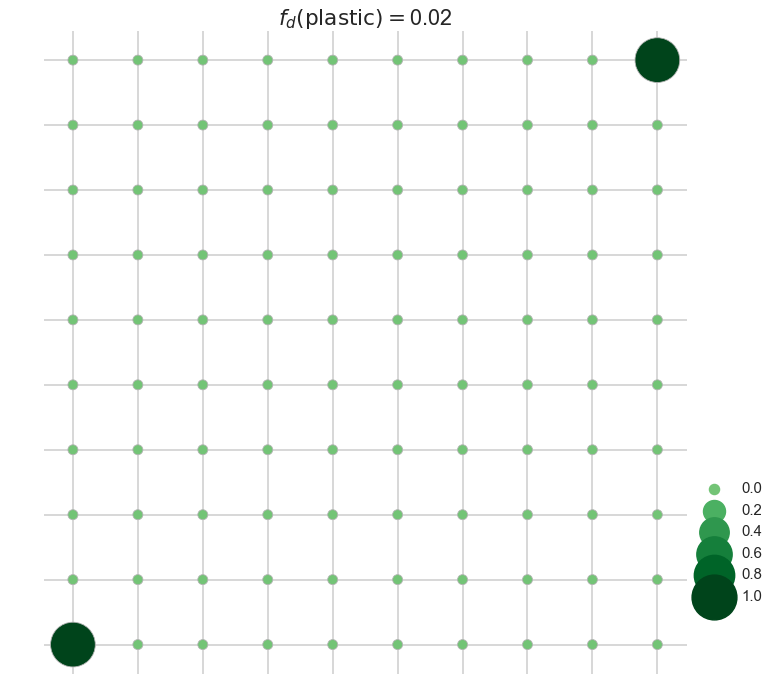

In [16]:
fig = plt.figure(figsize=(10,10))

name = r'$f_{d}(\mathrm{plastic}) = $' + str(np.round(np.mean(data_d['freq']), decimals=2))

g = sns.relplot(
    data=data_d,
    x="level_0", y="level_1", hue="freq", size="freq",
    palette="Greens", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(100, 2000), size_norm=(0, 1), clip_on=False
)
g.set(xlabel="", ylabel="   ", aspect="equal", yticks=range(10), title=name, xticks=range(10), yticklabels=[], xticklabels=[])
g.despine(left=True, bottom=True)

for artist in g.legend.legendHandles:
    artist.set_edgecolor(".8")
    
handles, labels = plt.gca().get_legend_handles_labels()

g._legend.remove()

plt.legend(handles, labels, loc=(1.01,0.1),frameon=False, edgecolor='white', markerscale=1., fontsize=15)

plt.savefig('../fig2c2.pdf', bbox_inches='tight', dpi=300)

## Figure 3a

In [17]:
dim = (10,10)
init_food = 1e9
data, index, mdata, pdata = simulate_pop_dynamic('A', 'C', 'quad', inti_food=init_food, mig_rate=0.05, n_pop=dim, t=1000, predation=True)

In [18]:
data_A = {'level_0': [], 'level_1': [], 'freq': []}
for i in range(dim[0]):
    for j in range(dim[0]):
        data_A['level_0'].append(i)
        data_A['level_1'].append(j)
        n = np.sum(data['pop1'][(i,j)][-1][5:])
        N = np.sum(data['pop1'][(i,j)][-1][5:]) + np.sum(data['pop2'][(i,j)][-1][5:])
        data_A['freq'].append(n/N)
data_A = pd.DataFrame(data_A)

data_d = {'level_0': [], 'level_1': [], 'freq': []}
for i in range(dim[0]):
    for j in range(dim[0]):
        data_d['level_0'].append(i)
        data_d['level_1'].append(j)
        n = data['pop1'][(i,j)][-1][2][0]
        N = data['pop1'][(i,j)][-1][2][0] + data['pop2'][(i,j)][-1][2][0]
        data_d['freq'].append(n/N)
data_d = pd.DataFrame(data_d)

<Figure size 720x720 with 0 Axes>

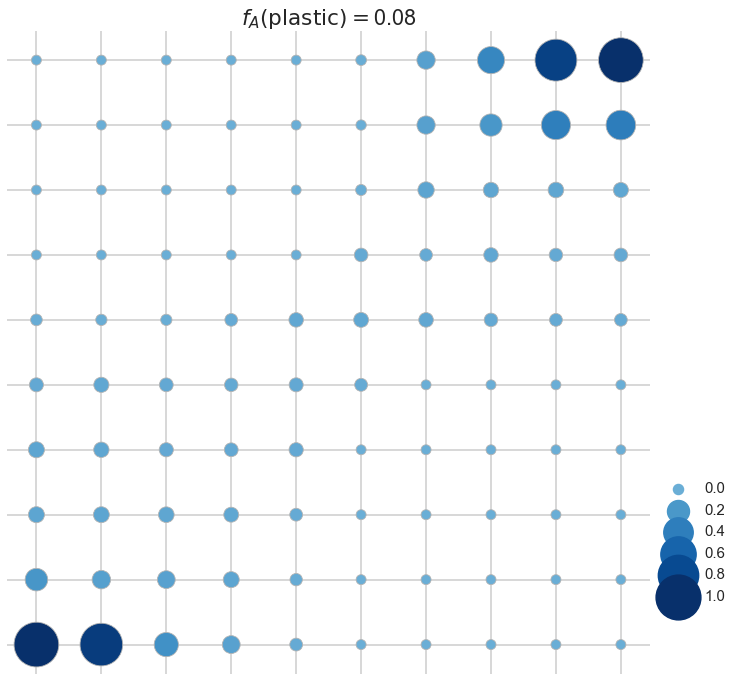

In [19]:
fig = plt.figure(figsize=(dim[0],dim[1]))

name = r'$f_{A}(\mathrm{plastic}) = $' + str(np.round(np.mean(data_A['freq']), decimals=2))

g = sns.relplot(
    data=data_A,
    x="level_0", y="level_1", hue="freq", size="freq",
    palette="Blues", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(100, 2000), size_norm=(0, 1), clip_on=False
)
g.set(xlabel="", ylabel='', aspect="equal", yticks=range(10), title=name, xticks=range(10), yticklabels=[], xticklabels=[])
g.despine(left=True, bottom=True)

for artist in g.legend.legendHandles:
    artist.set_edgecolor(".8")
    
handles, labels = plt.gca().get_legend_handles_labels()

g._legend.remove()

plt.legend(handles, labels, loc=(1.01,0.1),frameon=False, edgecolor='white', markerscale=1., fontsize=15)

plt.savefig('../fig3a1.pdf', bbox_inches='tight', dpi=300)

<Figure size 720x720 with 0 Axes>

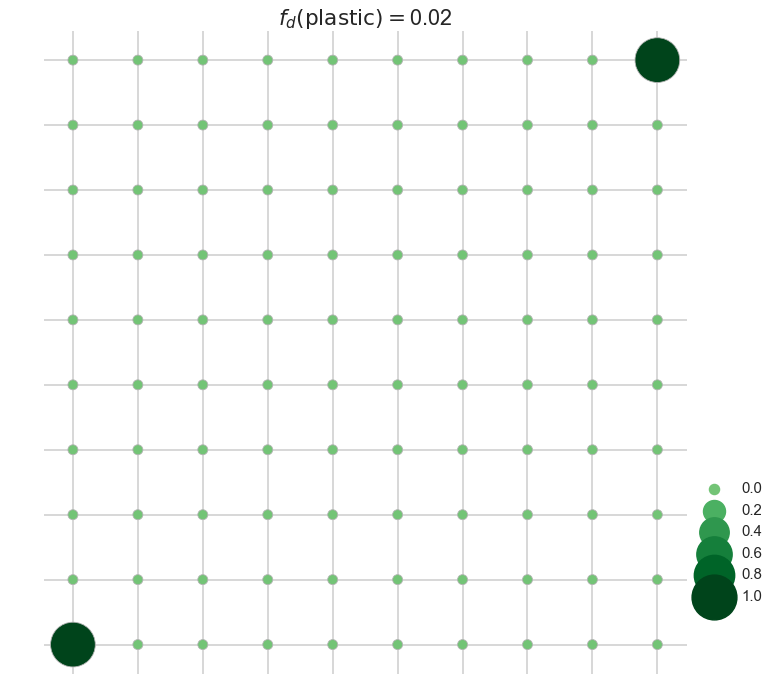

In [20]:
fig = plt.figure(figsize=(10,10))

name = r'$f_{d}(\mathrm{plastic}) = $' + str(np.round(np.mean(data_d['freq']), decimals=2))

g = sns.relplot(
    data=data_d,
    x="level_0", y="level_1", hue="freq", size="freq",
    palette="Greens", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(100, 2000), size_norm=(0, 1), clip_on=False
)
g.set(xlabel="", ylabel="   ", aspect="equal", yticks=range(10), title=name, xticks=range(10), yticklabels=[], xticklabels=[])
g.despine(left=True, bottom=True)

for artist in g.legend.legendHandles:
    artist.set_edgecolor(".8")
    
handles, labels = plt.gca().get_legend_handles_labels()

g._legend.remove()

plt.legend(handles, labels, loc=(1.01,0.1),frameon=False, edgecolor='white', markerscale=1., fontsize=15)

plt.savefig('../fig3a2.pdf', bbox_inches='tight', dpi=300)

## Figure 3b

In [21]:
dim = (10,10)
init_food = 1e9
data, index, mdata, pdata = simulate_pop_dynamic('A', 'C', 'quad_2', inti_food=init_food, mig_rate=0.05, n_pop=dim, t=1000, predation=True)

In [22]:
data_A = {'level_0': [], 'level_1': [], 'freq': []}
for i in range(dim[0]):
    for j in range(dim[0]):
        data_A['level_0'].append(i)
        data_A['level_1'].append(j)
        n = np.sum(data['pop1'][(i,j)][-1][5:])
        N = np.sum(data['pop1'][(i,j)][-1][5:]) + np.sum(data['pop2'][(i,j)][-1][5:])
        data_A['freq'].append(n/N)
data_A = pd.DataFrame(data_A)

data_d = {'level_0': [], 'level_1': [], 'freq': []}
for i in range(dim[0]):
    for j in range(dim[0]):
        data_d['level_0'].append(i)
        data_d['level_1'].append(j)
        n = data['pop1'][(i,j)][-1][2][0]
        N = data['pop1'][(i,j)][-1][2][0] + data['pop2'][(i,j)][-1][2][0]
        data_d['freq'].append(n/N)
data_d = pd.DataFrame(data_d)

<Figure size 720x720 with 0 Axes>

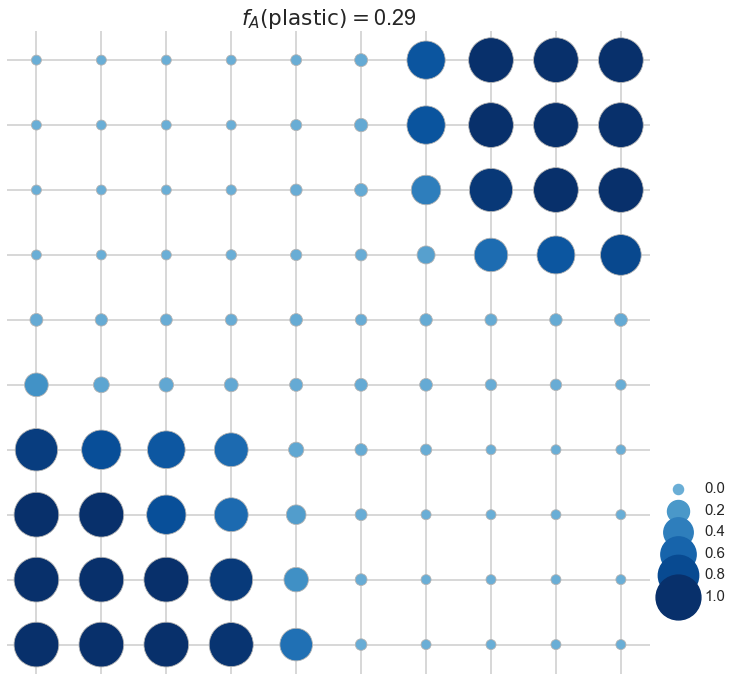

In [23]:
fig = plt.figure(figsize=(dim[0],dim[1]))

name = r'$f_{A}(\mathrm{plastic}) = $' + str(np.round(np.mean(data_A['freq']), decimals=2))

g = sns.relplot(
    data=data_A,
    x="level_0", y="level_1", hue="freq", size="freq",
    palette="Blues", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(100, 2000), size_norm=(0, 1), clip_on=False
)
g.set(xlabel="", ylabel='', aspect="equal", yticks=range(10), title=name, xticks=range(10), yticklabels=[], xticklabels=[])
g.despine(left=True, bottom=True)

for artist in g.legend.legendHandles:
    artist.set_edgecolor(".8")
    
handles, labels = plt.gca().get_legend_handles_labels()

g._legend.remove()

plt.legend(handles, labels, loc=(1.01,0.1),frameon=False, edgecolor='white', markerscale=1., fontsize=15)

plt.savefig('../fig3b1.pdf', bbox_inches='tight', dpi=300)

<Figure size 720x720 with 0 Axes>

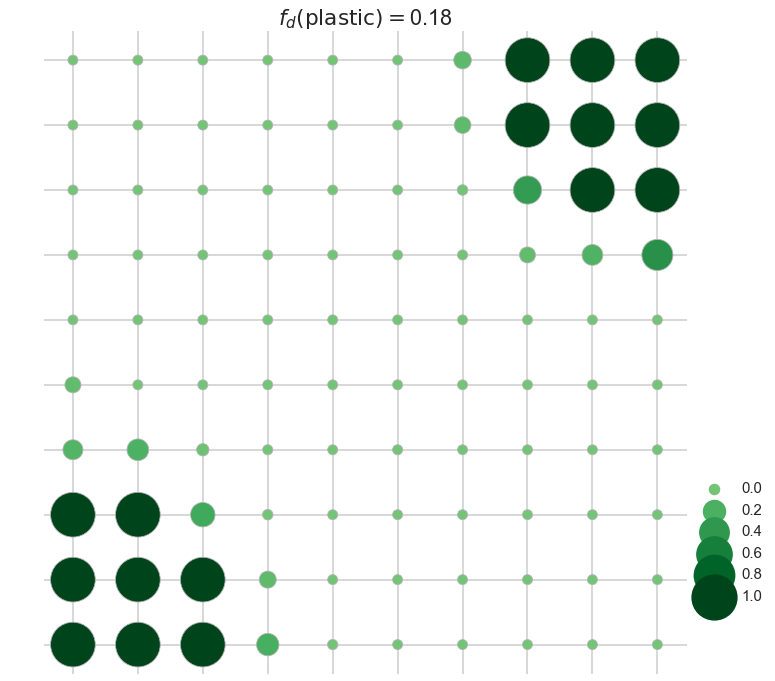

In [24]:
fig = plt.figure(figsize=(10,10))

name = r'$f_{d}(\mathrm{plastic}) = $' + str(np.round(np.mean(data_d['freq']), decimals=2))

g = sns.relplot(
    data=data_d,
    x="level_0", y="level_1", hue="freq", size="freq",
    palette="Greens", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(100, 2000), size_norm=(0, 1), clip_on=False
)
g.set(xlabel="", ylabel="   ", aspect="equal", yticks=range(10), title=name, xticks=range(10), yticklabels=[], xticklabels=[])
g.despine(left=True, bottom=True)

for artist in g.legend.legendHandles:
    artist.set_edgecolor(".8")
    
handles, labels = plt.gca().get_legend_handles_labels()

g._legend.remove()

plt.legend(handles, labels, loc=(1.01,0.1),frameon=False, edgecolor='white', markerscale=1., fontsize=15)

plt.savefig('../fig3b2.pdf', bbox_inches='tight', dpi=300)

## Figure 4

### 4-a

In [33]:
dim = (10,10)
f_A_t = []
f_d_t = []
x = np.linspace(0.01, 0.2, 20)
for m_rate in tqdm(x):
    data, index, mdata, pdata = simulate_pop_dynamic('A', 'C', 'OP50', inti_food=init_food, mig_rate=m_rate, n_pop=dim, t=1000, predation=True)
    
    data_A = {'level_0': [], 'level_1': [], 'freq': []}
    for i in range(dim[0]):
        for j in range(dim[0]):
            data_A['level_0'].append(i)
            data_A['level_1'].append(j)
            n = float(np.sum(data['pop1'][(i,j)][-1][5:]))
            N = np.sum(data['pop1'][(i,j)][-1][5:]) + np.sum(data['pop2'][(i,j)][-1][5:])
            data_A['freq'].append(n/N)
    data_A = pd.DataFrame(data_A)

    data_d = {'level_0': [], 'level_1': [], 'freq': []}
    for i in range(dim[0]):
        for j in range(dim[0]):
            data_d['level_0'].append(i)
            data_d['level_1'].append(j)
            n = data['pop1'][(i,j)][-1][2]
            N = data['pop1'][(i,j)][-1][2] + data['pop2'][(i,j)][-1][2]
            data_d['freq'].append(n/N)
    data_d = pd.DataFrame(data_d)
    
    f_A_t.append(np.mean(data_A['freq']))
    f_d_t.append(np.mean(data_d['freq']))

100%|██████████| 20/20 [03:42<00:00, 11.13s/it]


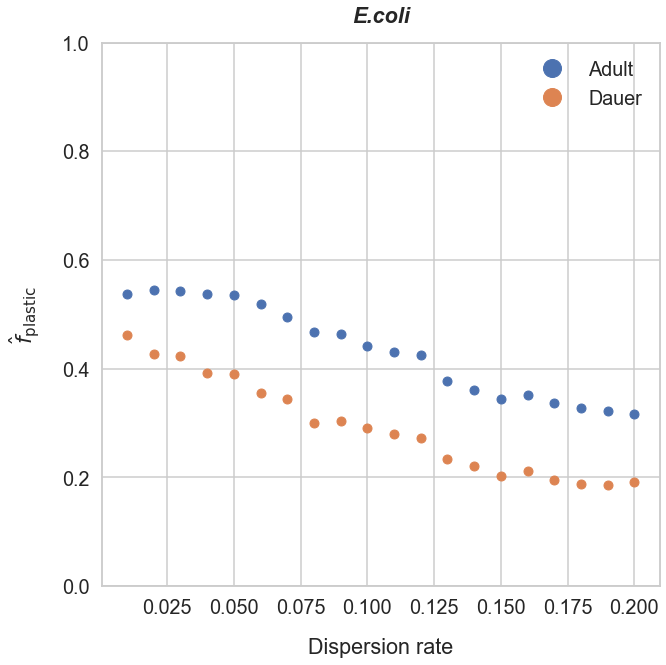

In [42]:
fig = plt.figure(figsize=(10,10))

plt.plot(x, f_A_t, 'o', label='Adult')
plt.plot(x, f_d_t, 'o', label='Dauer')
plt.ylim(0, 1)
plt.legend(frameon=False, markerscale=2)
plt.xlabel('Dispersion rate', labelpad=20)
plt.ylabel(r'$\hat{f}_{\mathrm{plastic}}$',labelpad=20)
plt.title('E.coli', pad=20, style='italic', fontdict = {'fontweight':'heavy'})
plt.savefig('../fig4a.pdf', bbox_inches='tight', dpi=300)

### 4-b

In [43]:
dim = (10,10)
f_A_t = []
f_d_t = []
x = np.linspace(0.01, 0.2, 20)
for m_rate in tqdm(x):
    data, index, mdata, pdata = simulate_pop_dynamic('A', 'C', 'Novo', inti_food=init_food, mig_rate=m_rate, n_pop=dim, t=1000, predation=True)
    
    data_A = {'level_0': [], 'level_1': [], 'freq': []}
    for i in range(dim[0]):
        for j in range(dim[0]):
            data_A['level_0'].append(i)
            data_A['level_1'].append(j)
            n = float(np.sum(data['pop1'][(i,j)][-1][5:]))
            N = np.sum(data['pop1'][(i,j)][-1][5:]) + np.sum(data['pop2'][(i,j)][-1][5:])
            data_A['freq'].append(n/N)
    data_A = pd.DataFrame(data_A)

    data_d = {'level_0': [], 'level_1': [], 'freq': []}
    for i in range(dim[0]):
        for j in range(dim[0]):
            data_d['level_0'].append(i)
            data_d['level_1'].append(j)
            n = data['pop1'][(i,j)][-1][2]
            N = data['pop1'][(i,j)][-1][2] + data['pop2'][(i,j)][-1][2]
            data_d['freq'].append(n/N)
    data_d = pd.DataFrame(data_d)
    
    f_A_t.append(np.mean(data_A['freq']))
    f_d_t.append(np.mean(data_d['freq']))

100%|██████████| 20/20 [03:37<00:00, 10.90s/it]


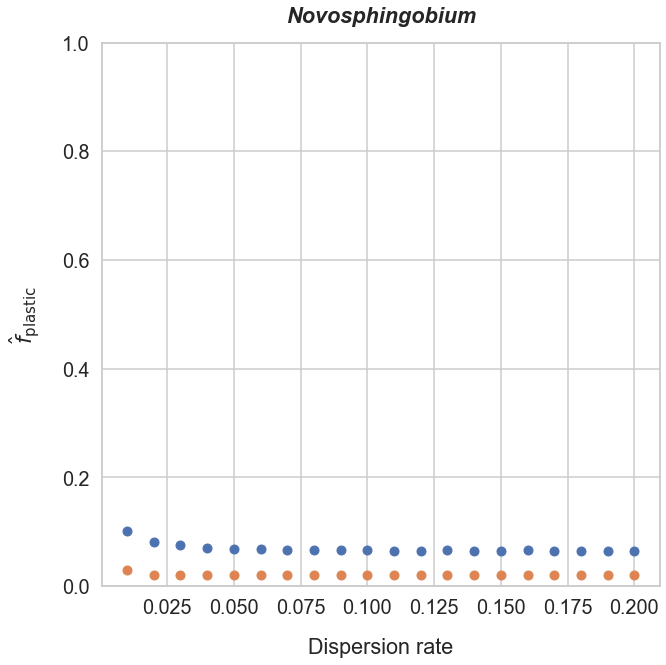

In [44]:
fig = plt.figure(figsize=(10,10))

plt.plot(x, f_A_t, 'o', label='Adult')
plt.plot(x, f_d_t, 'o', label='Dauer')
plt.ylim(0, 1)
plt.xlabel('Dispersion rate', labelpad=20)
plt.ylabel(r'$\hat{f}_{\mathrm{plastic}}$', labelpad=20)
plt.title('Novosphingobium', pad=20, style='italic', fontdict = {'fontweight':'heavy'})
plt.savefig('../fig4b.pdf', bbox_inches='tight', dpi=300)

### 4-c

In [45]:
dim = (10,10)
f_A_t = []
f_d_t = []
x = np.linspace(0.01, 0.2, 20)
for m_rate in tqdm(x):
    data, index, mdata, pdata = simulate_pop_dynamic('A', 'C', 'quad', inti_food=init_food, mig_rate=m_rate, n_pop=dim, t=1000, predation=True)
    
    data_A = {'level_0': [], 'level_1': [], 'freq': []}
    for i in range(dim[0]):
        for j in range(dim[0]):
            data_A['level_0'].append(i)
            data_A['level_1'].append(j)
            n = float(np.sum(data['pop1'][(i,j)][-1][5:]))
            N = np.sum(data['pop1'][(i,j)][-1][5:]) + np.sum(data['pop2'][(i,j)][-1][5:])
            data_A['freq'].append(n/N)
    data_A = pd.DataFrame(data_A)

    data_d = {'level_0': [], 'level_1': [], 'freq': []}
    for i in range(dim[0]):
        for j in range(dim[0]):
            data_d['level_0'].append(i)
            data_d['level_1'].append(j)
            n = data['pop1'][(i,j)][-1][2]
            N = data['pop1'][(i,j)][-1][2] + data['pop2'][(i,j)][-1][2]
            data_d['freq'].append(n/N)
    data_d = pd.DataFrame(data_d)
    
    f_A_t.append(np.mean(data_A['freq']))
    f_d_t.append(np.mean(data_d['freq']))

100%|██████████| 20/20 [03:43<00:00, 11.19s/it]


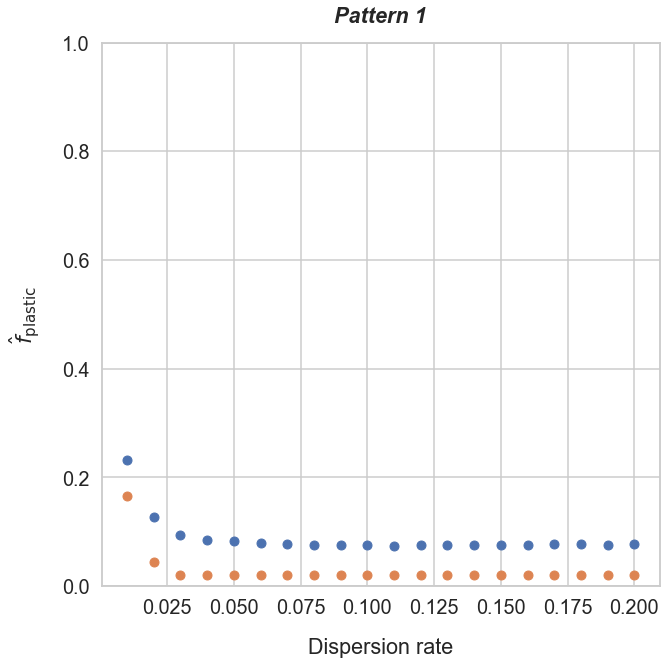

In [46]:
fig = plt.figure(figsize=(10,10))

plt.plot(x, f_A_t, 'o', label='Adult')
plt.plot(x, f_d_t, 'o', label='Dauer')
plt.ylim(0, 1)
plt.xlabel('Dispersion rate', labelpad=20)
plt.ylabel(r'$\hat{f}_{\mathrm{plastic}}$',labelpad=20)
plt.title('Pattern 1', pad=20, style='italic', fontdict = {'fontweight':'heavy'})
plt.savefig('../fig4c.pdf', bbox_inches='tight', dpi=300)

### 4-d

In [47]:
dim = (10,10)
f_A_t = []
f_d_t = []
x = np.linspace(0.01, 0.2, 20)
for m_rate in tqdm(x):
    data, index, mdata, pdata = simulate_pop_dynamic('A', 'C', 'quad_2', inti_food=init_food, mig_rate=m_rate, n_pop=dim, t=1000, predation=True)
    
    data_A = {'level_0': [], 'level_1': [], 'freq': []}
    for i in range(dim[0]):
        for j in range(dim[0]):
            data_A['level_0'].append(i)
            data_A['level_1'].append(j)
            n = float(np.sum(data['pop1'][(i,j)][-1][5:]))
            N = np.sum(data['pop1'][(i,j)][-1][5:]) + np.sum(data['pop2'][(i,j)][-1][5:])
            data_A['freq'].append(n/N)
    data_A = pd.DataFrame(data_A)

    data_d = {'level_0': [], 'level_1': [], 'freq': []}
    for i in range(dim[0]):
        for j in range(dim[0]):
            data_d['level_0'].append(i)
            data_d['level_1'].append(j)
            n = data['pop1'][(i,j)][-1][2]
            N = data['pop1'][(i,j)][-1][2] + data['pop2'][(i,j)][-1][2]
            data_d['freq'].append(n/N)
    data_d = pd.DataFrame(data_d)
    
    f_A_t.append(np.mean(data_A['freq']))
    f_d_t.append(np.mean(data_d['freq']))

100%|██████████| 20/20 [03:42<00:00, 11.13s/it]


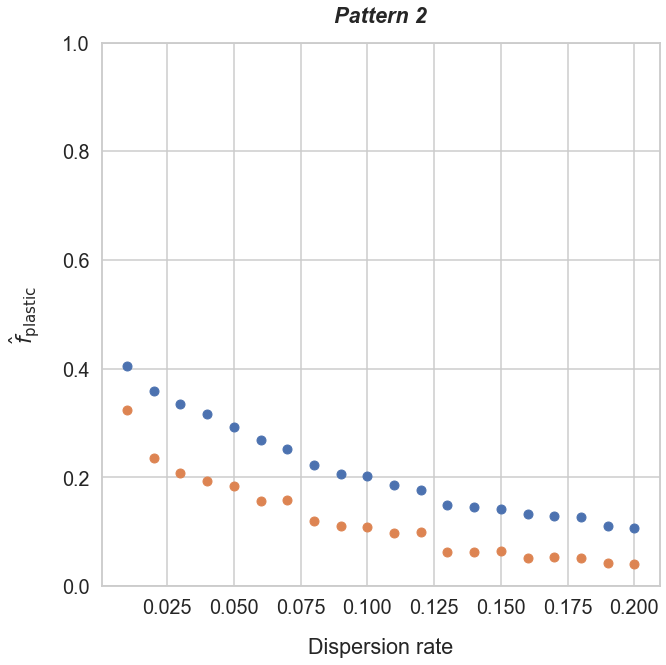

In [48]:
fig = plt.figure(figsize=(10,10))

plt.plot(x, f_A_t, 'o', label='Adult')
plt.plot(x, f_d_t, 'o', label='Dauer')
plt.ylim(0, 1)
plt.xlabel('Dispersion rate', labelpad=20)
plt.ylabel(r'$\hat{f}_{\mathrm{plastic}}$', labelpad=20)
plt.title('Pattern 2', pad=20, style='italic', fontdict = {'fontweight':'heavy'})
plt.savefig('../fig4d.pdf', bbox_inches='tight', dpi=300)

## Figure 5

### 5-a

In [63]:
heat = np.zeros((10,10))
dim = (10,10)
h_lst = np.logspace(-2, -1, 10)
m_lst = np.linspace(0.01, 0.2, 10)
data_test = {}
for h in tqdm(range(len(h_lst))):
    for m in range(len(m_lst)):
        data, index, mdata, pdata = simulate_pop_dynamic('A', 'C', 'OP50', inti_food=init_food, mig_rate=m_lst[m], n_pop=dim,  t=1000, predation=True, h_time=h_lst[h])
        data_A = {'level_0': [], 'level_1': [], 'freq': []}
        for i in range(dim[0]):
            for j in range(dim[0]):
                data_A['level_0'].append(i)
                data_A['level_1'].append(j)
                n = float(np.sum(data['pop1'][(i,j)][-1][5:]))
                N = np.sum(data['pop1'][(i,j)][-1][5:]) + np.sum(data['pop2'][(i,j)][-1][5:])
                data_A['freq'].append(n/N)
        data_A = pd.DataFrame(data_A)

        data_d = {'level_0': [], 'level_1': [], 'freq': []}
        for i in range(dim[0]):
            for j in range(dim[0]):
                data_d['level_0'].append(i)
                data_d['level_1'].append(j)
                n = data['pop1'][(i,j)][-1][2]
                N = data['pop1'][(i,j)][-1][2] + data['pop2'][(i,j)][-1][2]
                data_d['freq'].append(n/N)
        data_d = pd.DataFrame(data_d)  
        heat[h][m] = np.mean(data_d['freq'])
        data_test[(h_lst[h], m_lst[m])] = np.mean(data_d['freq'])

100%|██████████| 10/10 [19:20<00:00, 116.08s/it]


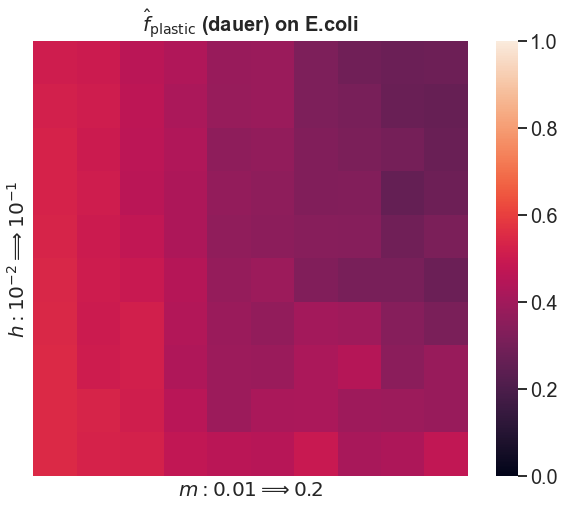

In [75]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
sns.heatmap(np.flip(heat, axis=0), linewidths=0, xticklabels=False, yticklabels=False, vmin=0., vmax=1, square=True)
name = r'$\hat{f}_{\mathrm{plastic}}$ (dauer) on E.coli'
ax.set_title(name, fontsize=20, y=1.01, fontdict = {'fontweight':'heavy'})
ax.set_ylabel(r'$h: 10^{-2} \Longrightarrow 10^{-1}$', fontsize=20)
ax.set_xlabel(r'$m : 0.01 \Longrightarrow 0.2 $', fontsize=20)
plt.savefig('../fig6a.pdf', bbox_inches='tight', dpi=300)

In [69]:
np.max([v[0] for i, (k,v) in enumerate(data_test.items())]), np.min([v[0] for i, (k,v) in enumerate(data_test.items())])

(0.5501190508110634, 0.26039871021110267)

### 5-b

In [76]:
heat = np.zeros((10,10))
dim = (10,10)
h_lst = np.logspace(-2, -1, 10)
m_lst = np.linspace(0.01, 0.2, 10)
data_test = {}
for h in tqdm(range(len(h_lst))):
    for m in range(len(m_lst)):
        data, index, mdata, pdata = simulate_pop_dynamic('A', 'C', 'Novo', inti_food=init_food, mig_rate=m_lst[m], n_pop=dim,  t=1000, predation=True, h_time=h_lst[h])
        data_A = {'level_0': [], 'level_1': [], 'freq': []}
        for i in range(dim[0]):
            for j in range(dim[0]):
                data_A['level_0'].append(i)
                data_A['level_1'].append(j)
                n = float(np.sum(data['pop1'][(i,j)][-1][5:]))
                N = np.sum(data['pop1'][(i,j)][-1][5:]) + np.sum(data['pop2'][(i,j)][-1][5:])
                data_A['freq'].append(n/N)
        data_A = pd.DataFrame(data_A)

        data_d = {'level_0': [], 'level_1': [], 'freq': []}
        for i in range(dim[0]):
            for j in range(dim[0]):
                data_d['level_0'].append(i)
                data_d['level_1'].append(j)
                n = data['pop1'][(i,j)][-1][2]
                N = data['pop1'][(i,j)][-1][2] + data['pop2'][(i,j)][-1][2]
                data_d['freq'].append(n/N)
        data_d = pd.DataFrame(data_d)  
        heat[h][m] = np.mean(data_d['freq'])
        data_test[(h_lst[h], m_lst[m])] = np.mean(data_d['freq'])

100%|██████████| 10/10 [19:01<00:00, 114.16s/it]


In [77]:
np.max([v[0] for i, (k,v) in enumerate(data_test.items())]), np.min([v[0] for i, (k,v) in enumerate(data_test.items())])

(0.27389650229704626, 0.020105313237037806)

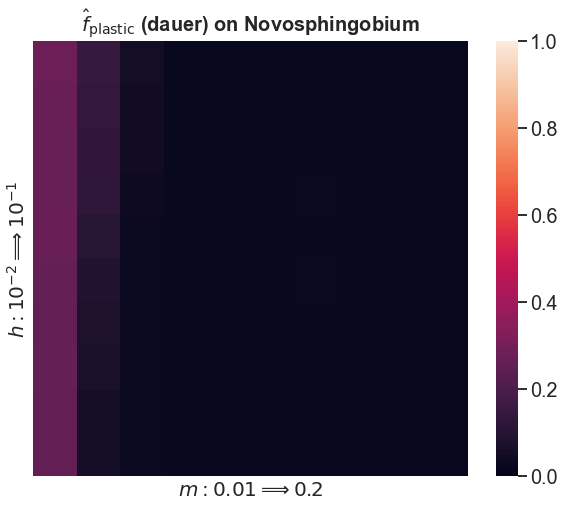

In [78]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
sns.heatmap(np.flip(heat, axis=0), linewidths=0, xticklabels=False, yticklabels=False, vmin=0., vmax=1, square=True)
name = r'$\hat{f}_{\mathrm{plastic}}$ (dauer) on Novosphingobium'
ax.set_title(name, fontsize=20, y=1.01, fontdict = {'fontweight':'heavy'})
ax.set_ylabel(r'$h: 10^{-2} \Longrightarrow 10^{-1}$', fontsize=20)
ax.set_xlabel(r'$m : 0.01 \Longrightarrow 0.2 $', fontsize=20)
plt.savefig('../fig6b.pdf', bbox_inches='tight', dpi=300)

### 5-c

In [79]:
heat = np.zeros((10,10))
dim = (10,10)
h_lst = np.logspace(-2, -1, 10)
m_lst = np.linspace(0.01, 0.2, 10)
data_test = {}
for h in tqdm(range(len(h_lst))):
    for m in range(len(m_lst)):
        data, index, mdata, pdata = simulate_pop_dynamic('A', 'C', 'quad', inti_food=init_food, mig_rate=m_lst[m], n_pop=dim,  t=1000, predation=True, h_time=h_lst[h])
        data_A = {'level_0': [], 'level_1': [], 'freq': []}
        for i in range(dim[0]):
            for j in range(dim[0]):
                data_A['level_0'].append(i)
                data_A['level_1'].append(j)
                n = float(np.sum(data['pop1'][(i,j)][-1][5:]))
                N = np.sum(data['pop1'][(i,j)][-1][5:]) + np.sum(data['pop2'][(i,j)][-1][5:])
                data_A['freq'].append(n/N)
        data_A = pd.DataFrame(data_A)

        data_d = {'level_0': [], 'level_1': [], 'freq': []}
        for i in range(dim[0]):
            for j in range(dim[0]):
                data_d['level_0'].append(i)
                data_d['level_1'].append(j)
                n = data['pop1'][(i,j)][-1][2]
                N = data['pop1'][(i,j)][-1][2] + data['pop2'][(i,j)][-1][2]
                data_d['freq'].append(n/N)
        data_d = pd.DataFrame(data_d)  
        heat[h][m] = np.mean(data_d['freq'])
        data_test[(h_lst[h], m_lst[m])] = np.mean(data_d['freq'])

100%|██████████| 10/10 [19:10<00:00, 115.08s/it]


In [80]:
np.max([v[0] for i, (k,v) in enumerate(data_test.items())]), np.min([v[0] for i, (k,v) in enumerate(data_test.items())])

(0.3248689545600972, 0.02001277248945542)

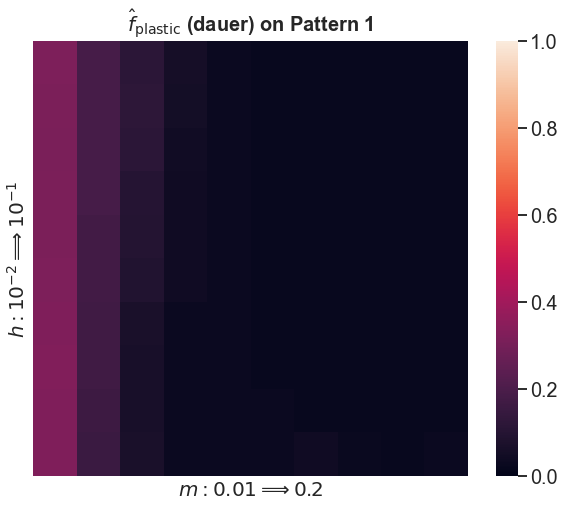

In [81]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
sns.heatmap(np.flip(heat, axis=0), linewidths=0, xticklabels=False, yticklabels=False, vmin=0., vmax=1, square=True)
name = r'$\hat{f}_{\mathrm{plastic}}$ (dauer) on Pattern 1'
ax.set_title(name, fontsize=20, y=1.01, fontdict = {'fontweight':'heavy'})
ax.set_ylabel(r'$h: 10^{-2} \Longrightarrow 10^{-1}$', fontsize=20)
ax.set_xlabel(r'$m : 0.01 \Longrightarrow 0.2 $', fontsize=20)
plt.savefig('../fig6c.pdf', bbox_inches='tight', dpi=300)

### 5d

In [82]:
heat = np.zeros((10,10))
dim = (10,10)
h_lst = np.logspace(-2, -1, 10)
m_lst = np.linspace(0.01, 0.2, 10)
data_test = {}
for h in tqdm(range(len(h_lst))):
    for m in range(len(m_lst)):
        data, index, mdata, pdata = simulate_pop_dynamic('A', 'C', 'quad_2', inti_food=init_food, mig_rate=m_lst[m], n_pop=dim,  t=1000, predation=True, h_time=h_lst[h])
        data_A = {'level_0': [], 'level_1': [], 'freq': []}
        for i in range(dim[0]):
            for j in range(dim[0]):
                data_A['level_0'].append(i)
                data_A['level_1'].append(j)
                n = float(np.sum(data['pop1'][(i,j)][-1][5:]))
                N = np.sum(data['pop1'][(i,j)][-1][5:]) + np.sum(data['pop2'][(i,j)][-1][5:])
                data_A['freq'].append(n/N)
        data_A = pd.DataFrame(data_A)

        data_d = {'level_0': [], 'level_1': [], 'freq': []}
        for i in range(dim[0]):
            for j in range(dim[0]):
                data_d['level_0'].append(i)
                data_d['level_1'].append(j)
                n = data['pop1'][(i,j)][-1][2]
                N = data['pop1'][(i,j)][-1][2] + data['pop2'][(i,j)][-1][2]
                data_d['freq'].append(n/N)
        data_d = pd.DataFrame(data_d)  
        heat[h][m] = np.mean(data_d['freq'])
        data_test[(h_lst[h], m_lst[m])] = np.mean(data_d['freq'])

100%|██████████| 10/10 [19:35<00:00, 117.57s/it]


In [83]:
np.max([v[0] for i, (k,v) in enumerate(data_test.items())]), np.min([v[0] for i, (k,v) in enumerate(data_test.items())])

(0.4207811469482944, 0.09920489886899758)

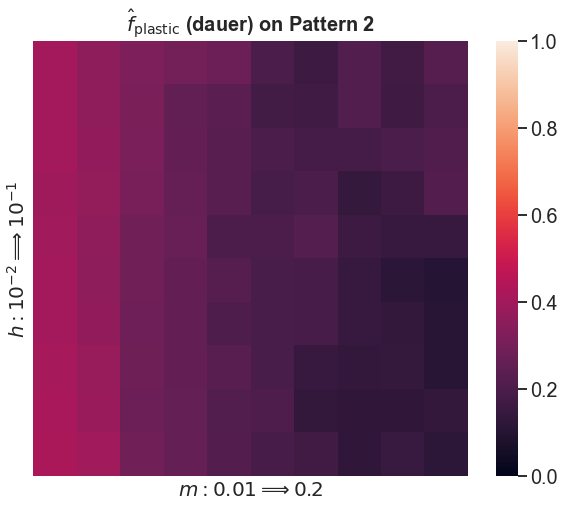

In [84]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
sns.heatmap(np.flip(heat, axis=0), linewidths=0, xticklabels=False, yticklabels=False, vmin=0., vmax=1, square=True)
name = r'$\hat{f}_{\mathrm{plastic}}$ (dauer) on Pattern 2'
ax.set_title(name, fontsize=20, y=1.01, fontdict = {'fontweight':'heavy'})
ax.set_ylabel(r'$h: 10^{-2} \Longrightarrow 10^{-1}$', fontsize=20)
ax.set_xlabel(r'$m : 0.01 \Longrightarrow 0.2 $', fontsize=20)
plt.savefig('../fig6d.pdf', bbox_inches='tight', dpi=300)

In [4]:
%load_ext watermark
%watermark -n -u -v -iv -w

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: Wed Sep 07 2022

Python implementation: CPython
Python version       : 3.10.4
IPython version      : 8.4.0

pandas    : 1.4.3
seaborn   : 0.11.2
matplotlib: 3.5.1
scipy     : 1.7.3

Watermark: 2.3.1

